## Intro

few types of classification problem
* Binary 
* muti class
* muti label

In [1]:
## creating data to view and fit
from sklearn.datasets import make_circles

n_smaple =1000
X,y = make_circles(n_smaple,noise=0.03,random_state=42)

In [2]:
# visualize the data
import pandas as pd
circles = pd.DataFrame({'X0': X[:,0], 'X1':X[:,0], 'label':y})
circles

,X0,X1,label
0,0.754246,0.754246,1
1,-0.756159,-0.756159,1
2,-0.815392,-0.815392,1
3,-0.393731,-0.393731,1
4,0.442208,0.442208,0
...,...,...,...
995,0.244054,0.244054,0
996,-0.978655,-0.978655,0
997,-0.136900,-0.136900,1
998,0.670362,0.670362,0


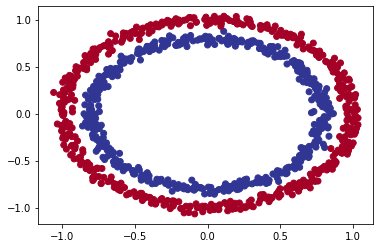

In [3]:
# visualize as a plot
import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1], c=y, cmap=plt.cm.RdYlBu)

In [4]:
X.shape,y.shape

((1000, 2), (1000,))

In [5]:
# build a model
import tensorflow as tf
from sklearn.model_selection import train_test_split
tf.random.set_seed(42)
model1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])
X_train, X_test , y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
model1.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer=tf.keras.optimizers.SGD(), metrics=['accuracy'])

model1.fit(X_train,y_train,epochs=5)

Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB

Epoch 1/5


2022-07-05 21:58:17.061740: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-07-05 21:58:17.062041: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2022-07-05 21:58:17.133227: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


25/25 [==============================] - 0s 3ms/step - loss: 1.4444 - accuracy: 0.4925
Epoch 2/5
 1/25 [>.............................] - ETA: 0s - loss: 0.7681 - accuracy: 0.5000

2022-07-05 21:58:17.292503: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


25/25 [==============================] - 0s 3ms/step - loss: 0.7313 - accuracy: 0.5012
Epoch 3/5
25/25 [==============================] - 0s 3ms/step - loss: 0.7085 - accuracy: 0.5000
Epoch 4/5
25/25 [==============================] - 0s 3ms/step - loss: 0.6997 - accuracy: 0.4963
Epoch 5/5
25/25 [==============================] - 0s 3ms/step - loss: 0.6966 - accuracy: 0.4950


In [6]:
model1.evaluate(X_test,y_test)

7/7 [==============================] - 0s 7ms/step - loss: 0.6954 - accuracy: 0.4950


2022-07-05 21:58:17.892659: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


[0.6954171657562256, 0.4949999749660492]

In [7]:
# improving our models relu always use
model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10,activation='relu'),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(1,activation='relu'),
])
callback = tf.keras.callbacks.EarlyStopping(monitor='loss',patience=5, mode='min')
model2.compile(loss=tf.keras.losses.BinaryCrossentropy(),metrics=['accuracy'],optimizer=tf.keras.optimizers.Adam())
print()
model2.fit(X_train,y_train,epochs=100,callbacks=[callback])


Epoch 1/100
12/25 [=============>................] - ETA: 0s - loss: 4.0880 - accuracy: 0.4844

2022-07-05 21:58:18.213962: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


25/25 [==============================] - 0s 5ms/step - loss: 3.5321 - accuracy: 0.5000
Epoch 2/100
25/25 [==============================] - 0s 4ms/step - loss: 1.5725 - accuracy: 0.5000
Epoch 3/100
25/25 [==============================] - 0s 4ms/step - loss: 1.2833 - accuracy: 0.5000
Epoch 4/100
25/25 [==============================] - 0s 4ms/step - loss: 1.1437 - accuracy: 0.5000
Epoch 5/100
25/25 [==============================] - 0s 4ms/step - loss: 1.0368 - accuracy: 0.5000
Epoch 6/100
25/25 [==============================] - 0s 4ms/step - loss: 0.9251 - accuracy: 0.5000
Epoch 7/100
25/25 [==============================] - 0s 5ms/step - loss: 0.8475 - accuracy: 0.5000
Epoch 8/100
25/25 [==============================] - 0s 5ms/step - loss: 0.8078 - accuracy: 0.5000
Epoch 9/100
25/25 [==============================] - 0s 5ms/step - loss: 0.7845 - accuracy: 0.4825
Epoch 10/100
25/25 [==============================] - 0s 6ms/step - loss: 0.7711 - accuracy: 0.4075
Epoch 11/100
25/25 [=

[]

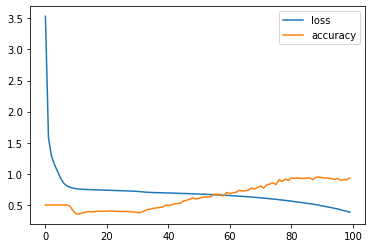

In [8]:
pd.DataFrame(model2.history.history).plot()
plt.plot()

In [9]:
model2.evaluate(X_test,y_test)

7/7 [==============================] - 0s 8ms/step - loss: 0.4308 - accuracy: 0.8700


2022-07-05 21:58:29.675925: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


[0.4308180809020996, 0.8700000047683716]

In [10]:
import numpy as np
def plt_graph(model,X,y):
    #   1. https://cs231n.github.io/neural-networks-case-study/
    #   2. https://github.com/madewithml/basics/blob/master/notebooks/09_Multilayer_Perceptrons/09_TF_Multilayer_Perceptrons.ipynb 
    x_min, x_max =X[:,0].min() - 0.1, X[:,0].max() +0.1
    y_min, y_max =X[:,1].min() - 0.1, X[:,1].max() +0.1
    xx,yy =np.meshgrid(np.linspace(x_min, x_max,100), np.linspace(y_min, y_max,100))

    x_in = np.c_[xx.ravel(),yy.ravel()]

    y_pred = model.predict(x_in)

    if(len(y_pred[0])>1):
        print("doing muticlass classification")
        y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
    else:
        print("if doing binary classifiaction")
        y_pred = np.round(y_pred).reshape(xx.shape)
      # Plot the decision boundary
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
        

  1/313 [..............................] - ETA: 12s

2022-07-05 21:58:29.848896: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 1s 2ms/step
if doing binary classifiaction


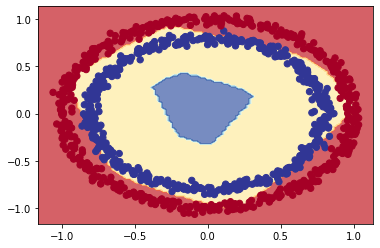

In [11]:
plt_graph(model=model2,X=X,y=y)

# Non Linearity

In [12]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(1,activation='linear')
])

model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),optimizer='adam',metrics=['accuracy'])

history = model_3.fit(X,y, epochs=100)

Epoch 1/100
24/32 [=====================>........] - ETA: 0s - loss: 4.2741 - accuracy: 0.4609

2022-07-05 21:58:30.732727: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


32/32 [==============================] - 0s 5ms/step - loss: 4.2979 - accuracy: 0.4670
Epoch 2/100
32/32 [==============================] - 0s 5ms/step - loss: 4.2317 - accuracy: 0.4400
Epoch 3/100
32/32 [==============================] - 0s 5ms/step - loss: 4.1610 - accuracy: 0.4310
Epoch 4/100
32/32 [==============================] - 0s 4ms/step - loss: 4.1183 - accuracy: 0.4270
Epoch 5/100
32/32 [==============================] - 0s 5ms/step - loss: 4.0784 - accuracy: 0.4240
Epoch 6/100
32/32 [==============================] - 0s 4ms/step - loss: 3.9582 - accuracy: 0.4170
Epoch 7/100
32/32 [==============================] - 0s 5ms/step - loss: 3.8602 - accuracy: 0.4090
Epoch 8/100
32/32 [==============================] - 0s 5ms/step - loss: 3.7907 - accuracy: 0.4090
Epoch 9/100
32/32 [==============================] - 0s 5ms/step - loss: 3.7608 - accuracy: 0.4130
Epoch 10/100
32/32 [==============================] - 0s 5ms/step - loss: 3.7168 - accuracy: 0.4180
Epoch 11/100
32/32 [=

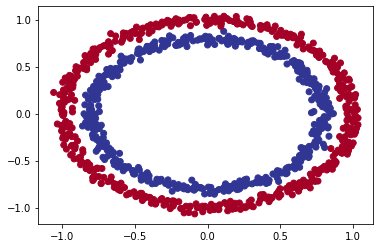

In [13]:
# check out our data

plt.scatter(X[:,0],X[:,1], c=y, cmap=plt.cm.RdYlBu)

110/313 [=========>....................] - ETA: 0s

2022-07-05 21:58:46.121757: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 0s 1ms/step
if doing binary classifiaction


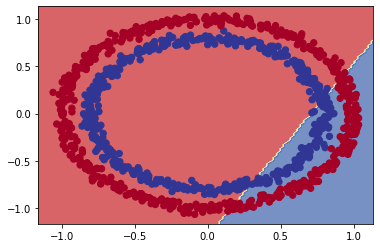

In [14]:
# Check the decision boundary
plt_graph(model=model_3,X=X,y=y)

In [15]:
# Perfect model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid'),
    # muti-class deal with soft-max
])
# callback = tf.keras.callbacks.EarlyStopping(monitor='loss',patience=5, mode='min')
model_4.compile(loss=tf.keras.losses.BinaryCrossentropy(),metrics=['accuracy'],optimizer=tf.keras.optimizers.Adam())

model_4.fit(X_train,y_train,epochs=130)

Epoch 1/130
25/25 [==============================] - 0s 4ms/step - loss: 0.6976 - accuracy: 0.5012
Epoch 2/130
 1/25 [>.............................] - ETA: 0s - loss: 0.6913 - accuracy: 0.5312

2022-07-05 21:58:46.805827: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


25/25 [==============================] - 0s 4ms/step - loss: 0.6968 - accuracy: 0.5025
Epoch 3/130
25/25 [==============================] - 0s 4ms/step - loss: 0.6963 - accuracy: 0.5062
Epoch 4/130
25/25 [==============================] - 0s 4ms/step - loss: 0.6960 - accuracy: 0.5062
Epoch 5/130
25/25 [==============================] - 0s 4ms/step - loss: 0.6957 - accuracy: 0.5037
Epoch 6/130
25/25 [==============================] - 0s 4ms/step - loss: 0.6953 - accuracy: 0.4963
Epoch 7/130
25/25 [==============================] - 0s 4ms/step - loss: 0.6951 - accuracy: 0.5000
Epoch 8/130
25/25 [==============================] - 0s 4ms/step - loss: 0.6950 - accuracy: 0.5012
Epoch 9/130
25/25 [==============================] - 0s 4ms/step - loss: 0.6948 - accuracy: 0.4988
Epoch 10/130
25/25 [==============================] - 0s 4ms/step - loss: 0.6946 - accuracy: 0.4887
Epoch 11/130
25/25 [==============================] - 0s 4ms/step - loss: 0.6945 - accuracy: 0.4912
Epoch 12/130
25/25 [

In [16]:
model_4.evaluate(X_test,y_test)

7/7 [==============================] - 0s 7ms/step - loss: 0.5709 - accuracy: 0.7150


2022-07-05 21:59:00.700636: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


[0.5709261298179626, 0.7149999737739563]

 33/313 [==>...........................] - ETA: 0s

2022-07-05 21:59:00.837204: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 0s 2ms/step
if doing binary classifiaction


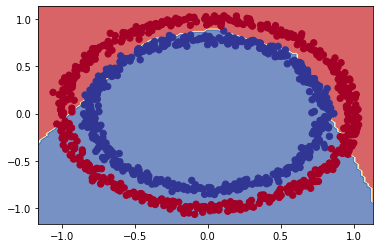

In [17]:
plt_graph(model=model_4,X=X,y=y)

In [18]:
A = tf.cast(tf.range(-10,10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

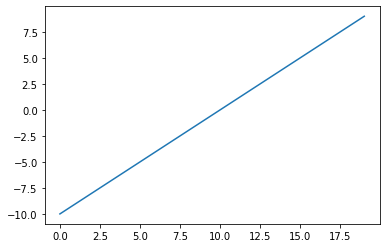

In [19]:
plt.plot(A)

In [20]:
def signmiod(x):
    return 1/(1+tf.exp(-x))
signmiod(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.53978682e-05, 1.23394624e-04, 3.35350167e-04, 9.11051058e-04,
       2.47262395e-03, 6.69285096e-03, 1.79862101e-02, 4.74258773e-02,
       1.19202934e-01, 2.68941432e-01, 5.00000000e-01, 7.31058598e-01,
       8.80797148e-01, 9.52574134e-01, 9.82013762e-01, 9.93307173e-01,
       9.97527421e-01, 9.99089003e-01, 9.99664664e-01, 9.99876618e-01],
      dtype=float32)>

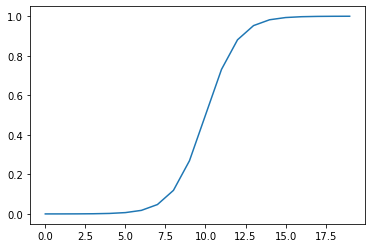

In [21]:
plt.plot(signmiod(A));
# reshape the line to non stright

In [22]:
# recreate reLU function
def reLu(x):
    return tf.maximum(x,0)

In [23]:
reLu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

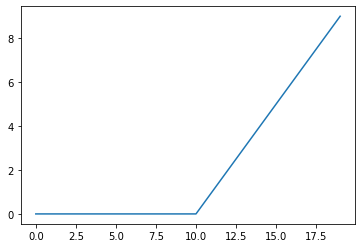

In [24]:
plt.plot(reLu(A));

In [25]:
tf.keras.activations.relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

In [26]:
tf.keras.activations.exponential(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5399924e-05, 1.2340985e-04, 3.3546262e-04, 9.1188174e-04,
       2.4787525e-03, 6.7379465e-03, 1.8315637e-02, 4.9787071e-02,
       1.3533527e-01, 3.6787942e-01, 1.0000000e+00, 2.7182817e+00,
       7.3890557e+00, 2.0085535e+01, 5.4598148e+01, 1.4841316e+02,
       4.0342868e+02, 1.0966333e+03, 2.9809578e+03, 8.1030811e+03],
      dtype=float32)>

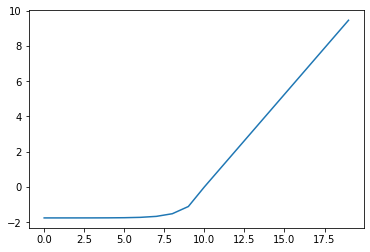

In [27]:
plt.plot(tf.keras.activations.selu(A))


# improve the model

In [28]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42)
X_test.shape, X_train.shape, y_train.shape

((200, 2), (800, 2), (800,))

In [29]:
tf.random.set_seed(42)
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid'),
    # tf.keras.layers.Flatten()
])
model_5.compile(loss=tf.keras.losses.binary_crossentropy, optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), metrics=['accuracy'])

model_5.fit(X_train,y_train,epochs=100)

Epoch 1/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6824 - accuracy: 0.5637
Epoch 2/100
 1/25 [>.............................] - ETA: 0s - loss: 0.6953 - accuracy: 0.4688

2022-07-05 21:59:02.072492: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


25/25 [==============================] - 0s 5ms/step - loss: 0.6750 - accuracy: 0.5650
Epoch 3/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6680 - accuracy: 0.5763
Epoch 4/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6635 - accuracy: 0.5725
Epoch 5/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6592 - accuracy: 0.5712
Epoch 6/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6475 - accuracy: 0.5938
Epoch 7/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6312 - accuracy: 0.6275
Epoch 8/100
25/25 [==============================] - 0s 5ms/step - loss: 0.6093 - accuracy: 0.6962
Epoch 9/100
25/25 [==============================] - 0s 5ms/step - loss: 0.5844 - accuracy: 0.7212
Epoch 10/100
25/25 [==============================] - 0s 4ms/step - loss: 0.5443 - accuracy: 0.7675
Epoch 11/100
25/25 [==============================] - 0s 4ms/step - loss: 0.4915 - accuracy: 0.8025
Epoch 12/100
25/25 [

In [30]:
model_5.evaluate(X_test,y_test)

7/7 [==============================] - 0s 7ms/step - loss: 0.0536 - accuracy: 0.9800


2022-07-05 21:59:13.066644: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


[0.05362717807292938, 0.9799999594688416]

  1/313 [..............................] - ETA: 8s

2022-07-05 21:59:13.208671: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 1s 2ms/step
if doing binary classifiaction
313/313 [==============================] - 0s 1ms/step
if doing binary classifiaction


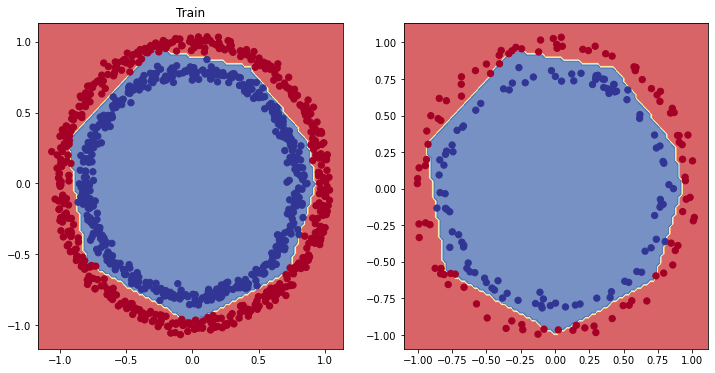

In [31]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plt_graph(model_5,X,y)
plt.subplot(1,2,2)
plt_graph(model_5,X_test,y_test)

In [32]:
import pandas as pd
pd.DataFrame(model_5.history.history).plot()

TypeError: no numeric data to plot

In [36]:
tf.random.set_seed(42)
model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid'),
    # tf.keras.layers.Flatten()
])
model_6.compile(loss=tf.keras.losses.binary_crossentropy, optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4*10**(epoch/20))

model_6.fit(X_train,y_train,epochs=100,callbacks=[lr_scheduler])

Epoch 1/100
25/25 [==============================] - 0s 5ms/step - loss: 0.6917 - accuracy: 0.5000 - lr: 1.0000e-04
Epoch 2/100
 1/25 [>.............................] - ETA: 0s - loss: 0.7023 - accuracy: 0.5312

2022-07-05 22:00:13.366867: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


25/25 [==============================] - 0s 5ms/step - loss: 0.6910 - accuracy: 0.4988 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 5ms/step - loss: 0.6903 - accuracy: 0.4975 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 5ms/step - loss: 0.6897 - accuracy: 0.5075 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 5ms/step - loss: 0.6888 - accuracy: 0.5062 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 5ms/step - loss: 0.6881 - accuracy: 0.5075 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 5ms/step - loss: 0.6873 - accuracy: 0.5050 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 5ms/step - loss: 0.6864 - accuracy: 0.5087 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 5ms/step - loss: 0.6856 - accuracy: 0.5037 - lr: 2.5119e-04
Epoch 10/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6849 - a

<AxesSubplot:>

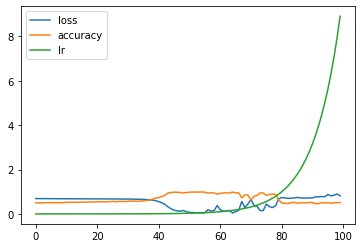

In [37]:
hist = pd.DataFrame(model_6.history.history)
hist.plot()

Text(0, 0.5, 'Lossess')

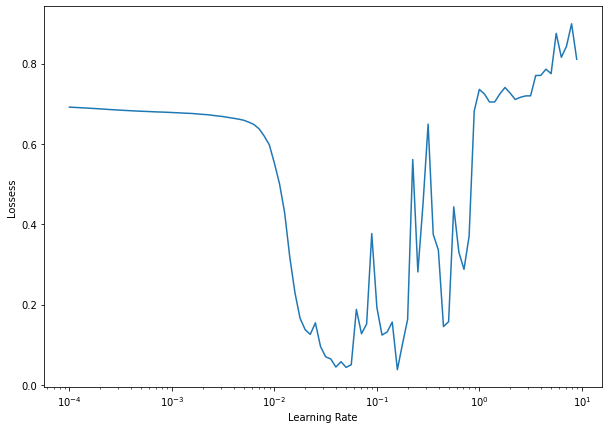

In [38]:
# plot the learning rate vs the losses
lrs = 1e-4*10**(tf.range(100)/20)
plt.figure(figsize=(10,7))
plt.semilogx(lrs, hist['loss'])
plt.xlabel("Learning Rate")
plt.ylabel("Lossess")

In [39]:
hist['loss'].min()

0.03778980299830437

In [40]:
perfect_lr = np.interp(hist['loss'].min(), lrs,hist['loss'])

In [41]:
tf.random.set_seed(42)
model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid'),
    # tf.keras.layers.Flatten()
])
model_7.compile(loss=tf.keras.losses.binary_crossentropy, optimizer=tf.keras.optimizers.Adam(lr=perfect_lr), metrics=['accuracy'])


model_7.fit(X_train,y_train,epochs=100)

Epoch 1/100


/Users/kingchan818/miniforge3/envs/tf/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)
2022-07-05 22:00:25.394726: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


25/25 [==============================] - 0s 5ms/step - loss: 0.6759 - accuracy: 0.5687
Epoch 2/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6389 - accuracy: 0.6237
Epoch 3/100
25/25 [==============================] - 0s 4ms/step - loss: 0.5842 - accuracy: 0.7175
Epoch 4/100
25/25 [==============================] - 0s 4ms/step - loss: 0.5563 - accuracy: 0.7312
Epoch 5/100
25/25 [==============================] - 0s 4ms/step - loss: 0.4837 - accuracy: 0.7775
Epoch 6/100
25/25 [==============================] - 0s 5ms/step - loss: 0.3266 - accuracy: 0.8950
Epoch 7/100
25/25 [==============================] - 0s 4ms/step - loss: 0.1416 - accuracy: 0.9862
Epoch 8/100
25/25 [==============================] - 0s 4ms/step - loss: 0.0784 - accuracy: 0.9912
Epoch 9/100
25/25 [==============================] - 0s 4ms/step - loss: 0.0539 - accuracy: 0.9912
Epoch 10/100
25/25 [==============================] - 0s 4ms/step - loss: 0.0538 - accuracy: 0.9862
Epoch 11/100
25/25 [=

In [42]:
model_7.evaluate(X_test,y_test)

7/7 [==============================] - 0s 6ms/step - loss: 0.0154 - accuracy: 0.9900


2022-07-05 22:00:36.754378: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


[0.015366069041192532, 0.9899999499320984]

In [43]:
model_4.evaluate(X_test,y_test)

1/7 [===>..........................] - ETA: 0s - loss: 0.5045 - accuracy: 0.8125

2022-07-05 22:00:36.882719: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


7/7 [==============================] - 0s 7ms/step - loss: 0.5709 - accuracy: 0.7150


[0.5709261298179626, 0.7149999737739563]

 34/313 [==>...........................] - ETA: 0s

2022-07-05 22:00:37.022312: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 0s 1ms/step
if doing binary classifiaction
313/313 [==============================] - 0s 1ms/step
if doing binary classifiaction


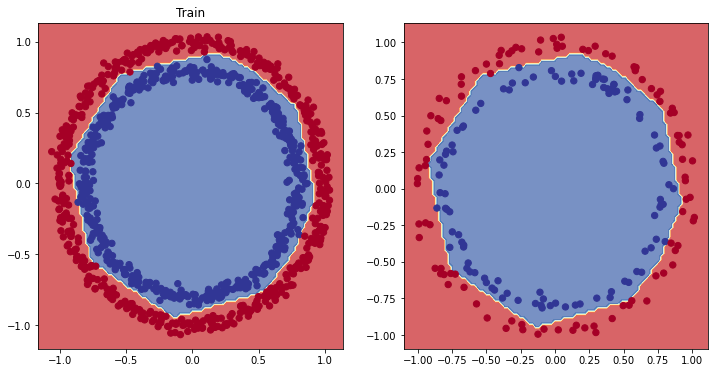

In [44]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plt_graph(model_7,X,y)
plt.subplot(1,2,2)
plt_graph(model_7,X_test,y_test)

# Classifiaction evaluation methods

In [45]:
loss, accuracy = model_7.evaluate(X_test,y_test)

7/7 [==============================] - 0s 4ms/step - loss: 0.0154 - accuracy: 0.9900


In [46]:
# The confusion metrics
from sklearn.metrics import confusion_matrix

y_pred = model_7.predict(X_test)

confusion_matrix(y_test,y_pred)

7/7 [==============================] - 0s 3ms/step


ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [48]:
y_test

array([1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 1])

In [47]:
y_pred

array([[9.99989629e-01],
       [1.62050957e-04],
       [9.99950171e-01],
       [2.15957723e-08],
       [9.97830927e-01],
       [9.99546647e-01],
       [8.45133443e-04],
       [2.62906678e-06],
       [9.99217749e-01],
       [7.83534197e-05],
       [5.29872000e-01],
       [9.99982357e-01],
       [1.79492224e-06],
       [9.99926805e-01],
       [5.61434681e-05],
       [9.99981284e-01],
       [9.99997616e-01],
       [9.65583453e-08],
       [9.99994159e-01],
       [7.96663358e-07],
       [4.78388847e-06],
       [2.60024393e-07],
       [9.99969363e-01],
       [4.79229422e-14],
       [1.08112639e-04],
       [1.11732620e-03],
       [1.28218753e-05],
       [2.82052213e-07],
       [3.10303738e-09],
       [9.99998808e-01],
       [9.99992013e-01],
       [1.30771596e-05],
       [1.39789551e-03],
       [9.99490380e-01],
       [1.38165968e-04],
       [9.99992132e-01],
       [6.45269811e-01],
       [9.99990702e-01],
       [9.99953985e-01],
       [9.99959946e-01],


oops we need to convert the model to soft-max or sigmoid

In [51]:
# convert the prediction value to binary formate
tf.round(y_pred)[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.]], dtype=float32)>

In [53]:
confusion_matrix(y_test,tf.round(y_pred))

array([[99,  1],
       [ 1, 99]])

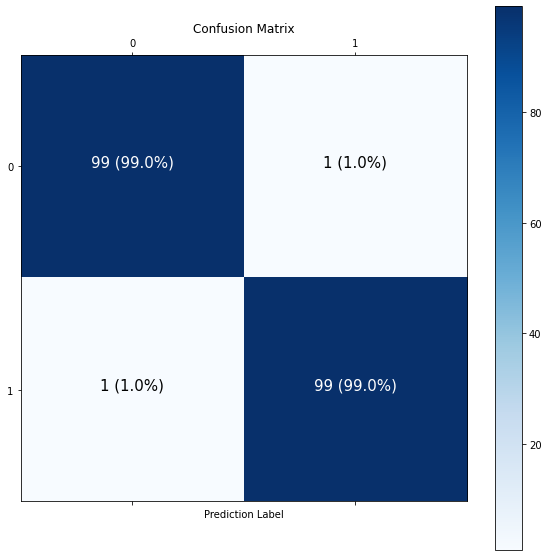

In [69]:
import itertools

figsize = (10,10)

cm = confusion_matrix(y_test,tf.round(y_pred))
cm_norm = cm.astype('float') /cm.sum(axis=1)[:, np.newaxis]
n_classes = cm.shape[0]

fig,ax = plt.subplots(figsize=figsize)

cax =  ax.matshow(cm, cmap=plt.cm.Blues)
fig.colorbar(cax)

classes = False
if classes:
    labels = classes
else:
    labels = np.arange(cm.shape[0])
ax.set(title="Confusion Matrix",xlabel="Prediction Label", xticks=np.arange(n_classes), yticks=np.arange(n_classes), xticklabels=labels, yticklabels=labels)

threshold = (cm.max() + cm.min()) /2


for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i,f"{cm[i, j]} ({cm_norm[i,j]*100:.1f}%)", horizontalalignment="center", color="white" if cm[i, j] > threshold else "black",size='15')